In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import pandas as pd
import os

## Eigenvectors and Eigenvalues

We have seen an example of a vector transformed by a matrix. Now imagine that the transformation of the initial vector gives us a new vector that has the exact same direction. The scale can be different but the direction is the same. Applying the matrix didn't change the direction of the vector. This special vector is called an eigenvector of the matrix.

Given a linear transformation represented by a matrix, the:
 - Eigenvector = The vector that is scaled, but is not moved off of its original span (change only in scale; not direction)
 - Eigenvalue = The # by which the eigenvector is scaled or squished during the transformation

_Note_: Rotations don't squish or scale anything

To understand the linear transformation of a matrix, we could plot the basis vectors and see how this changes. But this is not a very good way
 - Use eigenvectors and values instead

Formally, $A\vec{v} = \lambda\vec{v}$

where $A$ = matrix,
      $\vec{v}$ = eigenvector
      $\lambda$ = eigenvalue


In [3]:
A = np.array([[5, 1],
              [3, 3]])

v = np.array([[1], [1]])

Av = np.dot(A, v)

values, vectors = np.linalg.eig(A)
values, vectors

(array([6., 2.]),
 array([[ 0.70710678, -0.31622777],
        [ 0.70710678,  0.9486833 ]]))

In [ ]:
x = np.linspace(0, 10, 1)
y = np.linspace(0, 10, 1)

fig = ff.create_quiver(x=x, y=y, u=v, v=Av)

### **Workflow** for eigenvectors and values

1.) $Ax = \lambda x = \lambda Ix$

2.) $Ax - \lambda Ix = 0$ --> $(A - \lambda I)x = 0$

3.) $det(A - \lambda I) = 0$

4.) . . .

5.) Solve for $\lambda$ = eigenvalues


## Principal Component Analysis (PCA)

Based on eigendecomposition: 

$S = ADA^T$

where $S$ = covariance matrix, $A$ is orthogonal and the columns $a_{ij}$ of $A$ are the eigenvectors and $D$ is a diagonal where the entries are the eigenvalues

In [54]:
returns = pd.read_csv('/Users/gabestechschulte/Documents/git-repos/University/machine-learning-II/lecture-1/stock_returns.csv')
returns.shape

(3020, 14)

In [56]:
returns = returns.iloc[:, 1:15].values
S = np.cov(returns.T)
S.shape

(13, 13)

In [57]:
A, D = np.linalg.eig(S)

In [58]:
comp = A*D*A.T

In [59]:
if comp.all() == S.all():
    print(True)
else:
    print('Something went wrong')

True


In [60]:
print('Eigenvectors (aka the loadings): \n', D, '\n')
print('Eigenvalues (aka magnitude): \n', A)

Eigenvectors (aka the loadings): 
 [[ 2.23291338e-01 -2.04527070e-01 -5.35288839e-03  8.45040555e-02
  -8.37933192e-02 -1.14272468e-01 -5.55141840e-01  7.92820175e-02
   3.02010014e-01  4.97198394e-01 -4.32657390e-01 -2.02444388e-01
   1.04543528e-04]
 [ 1.67812257e-01 -1.37439453e-01  2.89079595e-02  2.66724338e-01
  -5.01142545e-02  3.67638059e-02 -2.76931368e-01 -6.71589537e-01
   2.31912414e-04 -2.13002691e-01  5.34357264e-03  3.96891917e-01
   3.82705433e-01]
 [ 6.21945606e-01  7.53410700e-01 -1.40743292e-01 -1.00890821e-02
  -3.32054075e-02  3.11110169e-02 -4.17400402e-03  9.04633423e-03
   1.79662595e-02  1.11214817e-01  7.99469919e-02  6.46021515e-02
   1.48081649e-02]
 [ 3.64940321e-01 -2.04978785e-01  2.51292157e-01 -2.88360089e-02
   8.49279454e-01 -6.59126391e-02  1.14075671e-01 -4.10502923e-05
   1.23554690e-01 -6.51268311e-02  4.23003663e-03 -2.09185596e-02
  -4.71902904e-02]
 [ 1.26630325e-01 -1.39360162e-01 -4.46265608e-02 -9.28418679e-01
  -7.47772389e-02  3.50788175e-

In [61]:
explained_variance = [i / sum(A) for i in A]
explained_variance

[0.5095307228615394,
 0.12846151230160913,
 0.06147487853158046,
 0.014707605506489585,
 0.045738723905630684,
 0.043926823491587975,
 0.03919750325701646,
 0.01832816943448919,
 0.03331280366848937,
 0.03146396582263642,
 0.028279493010961575,
 0.023959224924283436,
 0.021618573283686052]

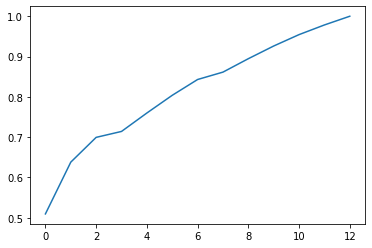

In [62]:
plt.plot(np.cumsum(explained_variance))